## Parcial de Analítica de Datos con visual studio code
**Hecho por: Juan Sebastián Clavijo Martínez (jsebastian.clavijoc@javeriana.edu.co)**<br />
ACTIVIDAD: PARCIAL 2<br />
Fecha: 20-11-2023<br />
Notas: Gracias por la clase, felices fiestas!<br />
Dataset: Datos de viviendas en boston, obtenido de: https://github.com/corredor-john/Exploratorydf_housing_01Analisys/blob/main/Varios/BostonHousing.csv

In [22]:
# importado de bibliotecas pertinentes
import pandas as pd #tratamiento de datos en un dataframe
import numpy as np #numerical python
import seaborn as sns #biblioteca versatil para estadistica y visualizacion
import matplotlib.pyplot as plt #biblioteca para vizualizacion de datos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# PARTE 1: PREPROCESAMIENTO DE DATOS

In [23]:
#Parte 1.1: carga de datos
#se traen los datos del repositorio
url = 'https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/main/Varios/BostonHousing.csv'
#se hace el obj dataframe
df_housing_01 = pd.read_csv(url)
#Se presentan los primeros 5 renglones 
df_housing_01.head(5) #inspección visual

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [24]:
#Parte 1.2: presentación general del df
df_housing_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### Observaciones sobre df_housing_01:

- **Número de Entradas y Columnas:**
  - El DataFrame tiene un total de 506 entradas (filas) y 14 columnas. Cada entrada corresponde a una observación en el conjunto de datos, mientras que las columnas representan las diferentes variables.

- **Tipos de Datos:**
  - La mayoría de las columnas contienen datos de tipo float64, que son adecuados para representar valores decimales. Tres columnas (CHAS, RAD, TAX) son de tipo int64, lo que indica variables categóricas o discretas.

- **Valores No Nulos:**
  - No hay valores nulos en ninguna de las columnas, lo que sugiere que el conjunto de datos está completo y no requiere imputación de datos faltantes.
  
- **Variables Potencialmente Categóricas:**
  - Las columnas CHAS, RAD, y TAX podrían considerarse variables categóricas debido a su naturaleza discreta. Dependiendo del enfoque del análisis, podría ser beneficioso tratarlas como categorías en lugar de variables continuas.

- **Variables Objetivo:**
  - La columna MEDV es la variable objetivo que se busca predecir en el análisis de regresión. Es de tipo float64, lo que confirma que se trata de una variable numérica.
  
- **Distribución de Variables:**
  - Al observar la información proporcionada, no hay indicios de desequilibrios extremos en las distribuciones de las variables, y todas tienen el mismo número de entradas no nulas.

Estas observaciones sugieren que el conjunto de datos está bien formateado y completo, lo que proporciona una base sólida para realizar análisis y modelos predictivos.


In [31]:
#Parte 1.3 se hace un resumen estadistico
df_housing_01.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Observaciones sobre df_housing_01.describe().T:

1. **Variabilidad de Datos:**
   - La columna CRIM (tasa de criminalidad per cápita) muestra una amplia variabilidad, con un rango desde 0.00632 hasta 88.9762. Esto sugiere que hay áreas con diferentes niveles de criminalidad en el conjunto de datos y probalemente en la ciudad de boston.

2. **Distribución de Áreas Residenciales:**
   - La columna ZN (proporción de terreno residencial zonificado) indica que, en promedio, alrededor del 11% del área de las zonas analizadas está zonificada para lotes residenciales más grandes.

3. **Niveles de Óxido Nítrico (NOX):**
   - La columna NOX (concentración de óxidos nítricos) tiene un promedio de 0.554695, con valores que varían desde 0.385 hasta 0.871. Esto proporciona información sobre la calidad del aire en las áreas analizadas.

4. **Proporción de Estudiantes a Maestros (PTRATIO):**
   - La columna PTRATIO (proporción de estudiantes a maestros) tiene un promedio de 18.46, lo que sugiere que, en promedio, hay aproximadamente 18 estudiantes por cada maestro en las escuelas de las áreas analizadas.

5. **Variable Objetivo (MEDV):**
   - La columna MEDV (valor medio de las viviendas) muestra un rango significativo, desde 5.000 hasta 50.000. Esto indica que las viviendas en las áreas analizadas tienen valores diversos, lo cual es crucial para el análisis de regresión.

In [32]:
##Parte 1.3: cuenta de datos null, etc. y limpieza
desaparecidos = len(df_housing_01)-len(df_housing_01.dropna())
Cantidad = len(df_housing_01)
print('Cantidad de datos observados con datos NaN',desaparecidos)
print('Cantidad de datos duplicados', df_housing_01.duplicated().sum())
##se eliminan los datos Null y Duplicados
df_housing_01.dropna(inplace=True)
df_housing_01.drop_duplicates(inplace=True)
#Se reinicia el indice por los elementos eliminados
df_housing_01.reset_index(drop = True, inplace = True)

Cantidad de obsev. con datos NaN 0
Cantidad de datos duplicados 0


## PARTE 2: OBJETIVOS

## Objetivo de Predicción

El objetivo principal es realizar predicciones sobre el valor medio de las viviendas (MEDV) basándose en las demás variables del conjunto de datos. Dado que el valor de *MEDV* es numérico, este problema se aborda como un problema de regresión.

### Modelos a usar:

#### Regresión Lineal:
- La Regresión Lineal es una elección inicial debido a su simplicidad y capacidad para proporcionar una relación lineal entre las características y la variable objetivo. Su interpretabilidad puede ser valiosa para entender las contribuciones individuales de cada característica.

#### Bosques Aleatorios:
- Los Bosques Aleatorios se seleccionan por su capacidad para manejar relaciones no lineales y capturar interacciones complejas entre variables. Además, ofrecen robustez contra el sobreajuste, lo que podría ser beneficioso en este análisis.

## Evaluación de Modelos

En esta sección, se evaluarán los modelos implementados (Regresión Lineal y Bosques Aleatorios) utilizando métricas específicas que proporcionan información crucial sobre el rendimiento de los modelos y su capacidad predictiva. A continuación, se detallan las métricas que se evaluarán y su significado:

### 1. Error Cuadrático Medio (MSE):
   - **¿Qué es?** El MSE mide el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales.
   - **¿Qué nos dice?** Un MSE más bajo indica que las predicciones son más cercanas a los valores reales. Es sensible a valores atípicos.
   - **Importancia:** Permite cuantificar la precisión del modelo y evaluar cómo de lejos están las predicciones de los valores reales.

### 2. Coeficiente de Determinación (R²):
   - **¿Qué es?** R² mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes.
   - **¿Qué nos dice?** Un R² cercano a 1 indica que el modelo explica bien la variabilidad de la variable objetivo.
   - **Importancia:** Proporciona información sobre la capacidad explicativa del modelo, es decir, cuánto de la variación en la variable dependiente es capturado por el modelo.

### 3. Visualización de Predicciones:
   - **¿Qué es?** Gráficos de dispersión que comparan las predicciones del modelo con los valores reales.
   - **¿Qué nos dicen?** Proporcionan una representación visual de la calidad de las predicciones y la relación entre las predicciones y los valores reales.
   - **Importancia:** Facilita la interpretación del rendimiento del modelo, especialmente para identificar patrones y posibles áreas de mejora.

Estas métricas y visualizaciones son esenciales para evaluar la efectividad de los modelos en el contexto específico del conjunto de datos, brindando información detallada sobre la capacidad predictiva y la calidad de las predicciones.

# PARTE 3: IMPLEMENTACIÓN

In [33]:
# Parte 3: implementación
# 3.1 Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = df_housing_01.drop('MEDV', axis=1)
y = df_housing_01['MEDV']

In [34]:
# 3.2. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# 3.3. Implementar Regresión Lineal
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)

In [36]:
# 3.4. Implementar Bosques Aleatorios
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)

# PARTE 4: EVALUACIÓN DE MODELOS

In [38]:
# 4.1. Evaluar métricas de rendimiento para Regresión Lineal
mse_lr = mean_squared_error(y_test, predictions_lr)
r2_lr = r2_score(y_test, predictions_lr)
print(f'Regresión Lineal - MSE: {mse_lr}, R²: {r2_lr}')

Regresión Lineal - MSE: 24.29111947497345, R²: 0.6687594935356329


In [39]:
# 4.2. Evaluar métricas de rendimiento para Bosques Aleatorios
mse_rf = mean_squared_error(y_test, predictions_rf)
r2_rf = r2_score(y_test, predictions_rf)
print(f'Bosques Aleatorios - MSE: {mse_rf}, R²: {r2_rf}')

Bosques Aleatorios - MSE: 8.410641715686271, R²: 0.8853101346578718


# PARTE 5: VISUALIZACIÓN DE RESULTADOS

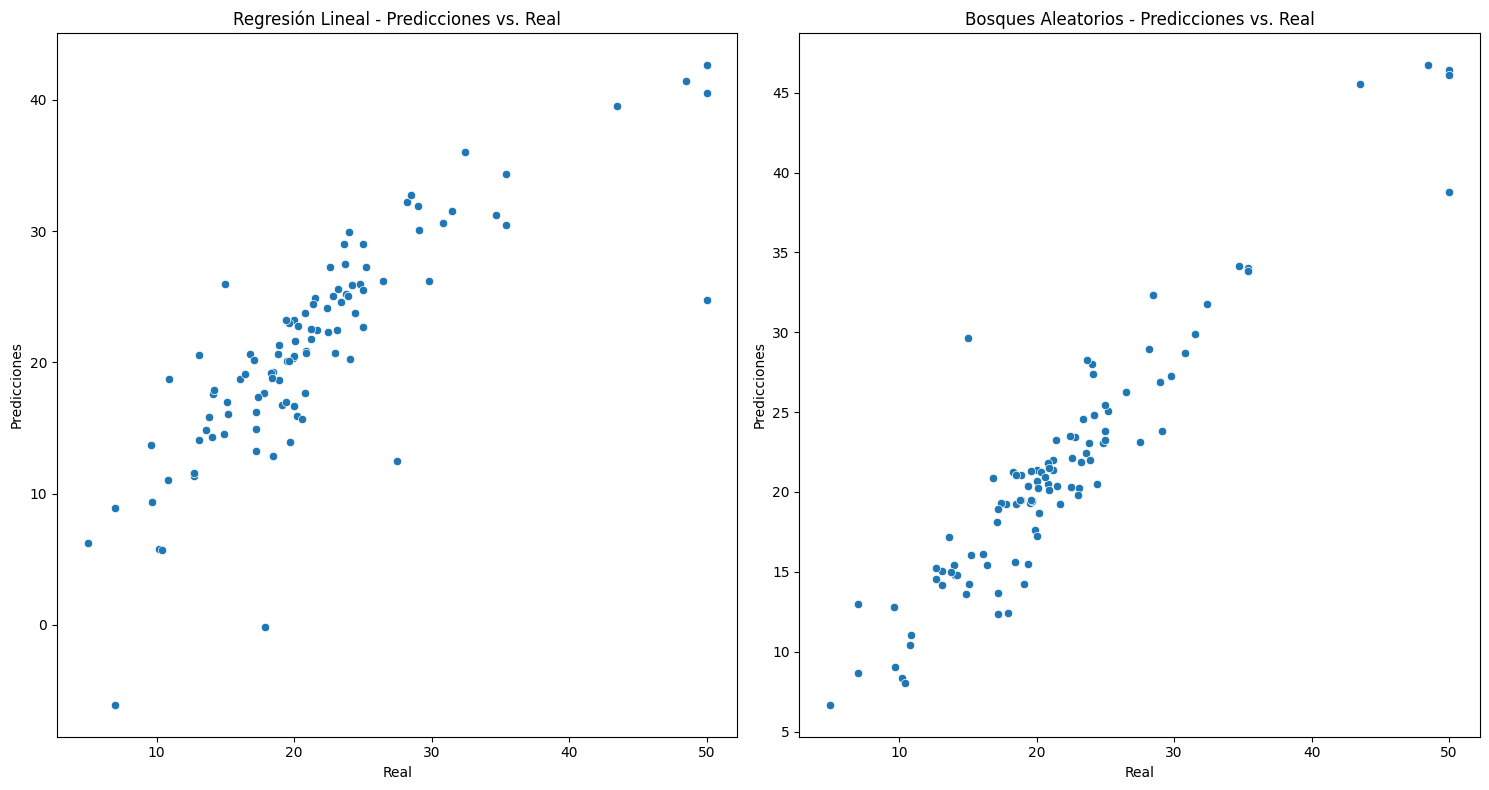

In [42]:
plt.figure(figsize=(15, 8))

# Regresión Lineal
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=predictions_lr)
plt.title('Regresión Lineal - Predicciones vs. Real')
plt.xlabel('Real')
plt.ylabel('Predicciones')

# Bosques Aleatorios
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=predictions_rf)
plt.title('Bosques Aleatorios - Predicciones vs. Real')
plt.xlabel('Real')
plt.ylabel('Predicciones')

plt.tight_layout()
plt.show()

# PARTE 6: OBSERVACIONES/COMENTARIOS
## Observaciones sobre las Métricas de Rendimiento

### 1. Regresión Lineal:
   - **MSE: 24.29**
     - La Regresión Lineal tiene un MSE de 24.29, indicando que, en promedio, las predicciones se desvían en aproximadamente 24.29 unidades al cuadrado de los valores reales. Este valor podría ser considerado moderado, pero se podría explorar si es aceptable en el contexto del problema.

   - **R²: 0.67**
     - El coeficiente de determinación (R²) de 0.67 sugiere que el modelo lineal explica aproximadamente el 67% de la variabilidad en la variable objetivo. Esto indica una capacidad moderada para explicar las variaciones, pero aún hay margen para mejorar.

### 2. Bosques Aleatorios:
   - **MSE: 8.41**
     - Los Bosques Aleatorios presentan un MSE significativamente menor (8.41) en comparación con la Regresión Lineal. Esto indica que las predicciones tienen una menor variabilidad respecto a los valores reales, indicando una mejor ajuste del modelo.

   - **R²: 0.89**
     - El R² de 0.89 destaca la capacidad excepcional de los Bosques Aleatorios para explicar la variabilidad en la variable objetivo. El 89% de la variación en los valores de viviendas parece ser capturada por el modelo, indicando un ajuste robusto.

### 3. Comparación General:
   - Ambos modelos muestran capacidades predictivas, pero los Bosques Aleatorios superan a la Regresión Lineal en términos de rendimiento.
   - La diferencia en los valores de MSE y R² sugiere que los Bosques Aleatorios son más efectivos para capturar relaciones complejas y proporcionan predicciones más precisas en comparación con la Regresión Lineal.
   - Sería útil explorar el contexto del problema para determinar si el rendimiento actual de los modelos es aceptable o si hay requisitos específicos de precisión que necesitan ser cumplidos.

## Comentarios sobre la gráfica de predicciones vs real

### 1. Tendencias 
  - Ambas gráficas muestran una tendencia lineal pronunciada, las predicciones parecen seguir una relación lineal con los valores reales , esto sugiere que un modelo lineal captura de manera efectiva la relación entre el MEDV y las demás características del conjunto de datos.
### 2. Distribución en ambas gráficas
  - La gráfica de regresión lineal tiene datos más dispersos en relación a la de bosques aleatorios, esto indica que bosques aleatorios puede predecir mejor la variabilidad.
### 3. Identificación de outliers
  - Bosques aleatorios tiene outliers más lejos del cúmulo de datos que regresión lineal, lo que podría sugerir que bosques aleatorios tiene más sensibilidad a este tipo de datos

# PARTE 7: CONCLUSIONES

1. **Elección del Modelo:**
   - La comparación entre la Regresión Lineal y los Bosques Aleatorios indica que, en este contexto, los Bosques Aleatorios superan a la Regresión Lineal en términos de rendimiento predictivo. El modelo de Bosques Aleatorios muestra una mayor capacidad para explicar la variabilidad en la variable objetivo (R² más alto) y presenta un menor error cuadrático medio (MSE), lo que sugiere predicciones más precisas.

2. **Consideraciones para Mejoras:**
   - A pesar de los buenos resultados, siempre es útil explorar oportunidades de mejora. Se podrían realizar ajustes adicionales en los modelos, para tener un valor de R² menor en la regresión lineal y que haya menos desviación en las predicciones.

3. **Cumplimiento de objetivos:**
   - Este trabajo cumple satisfactoriamente con el objetivo propuesto, realizar predicciones sobre el valor medio de las viviendas (MEDV) basándose en las demás variables del conjunto de datos. Es posible comparar las predicciones entre los dos modelos y los datos rerales con la gráfica.
